In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
# importing sys
import sys
# adding Folder_2/subfolder to the system path
sys.path.insert(0, '/Users/glover.co/Documents/laszlo/NetDesign')
import network_design as nd
import time
from matplotlib.colors import to_rgba
import matplotlib.animation as animation
import netrd

/Users/glover.co/anaconda3/lib/python3.11/site-packages/graph_tool/draw/cairo_draw.py:681: UserWarning: Unknown parameter: node_size
  warnings.warn("Unknown parameter: " + k, UserWarning)


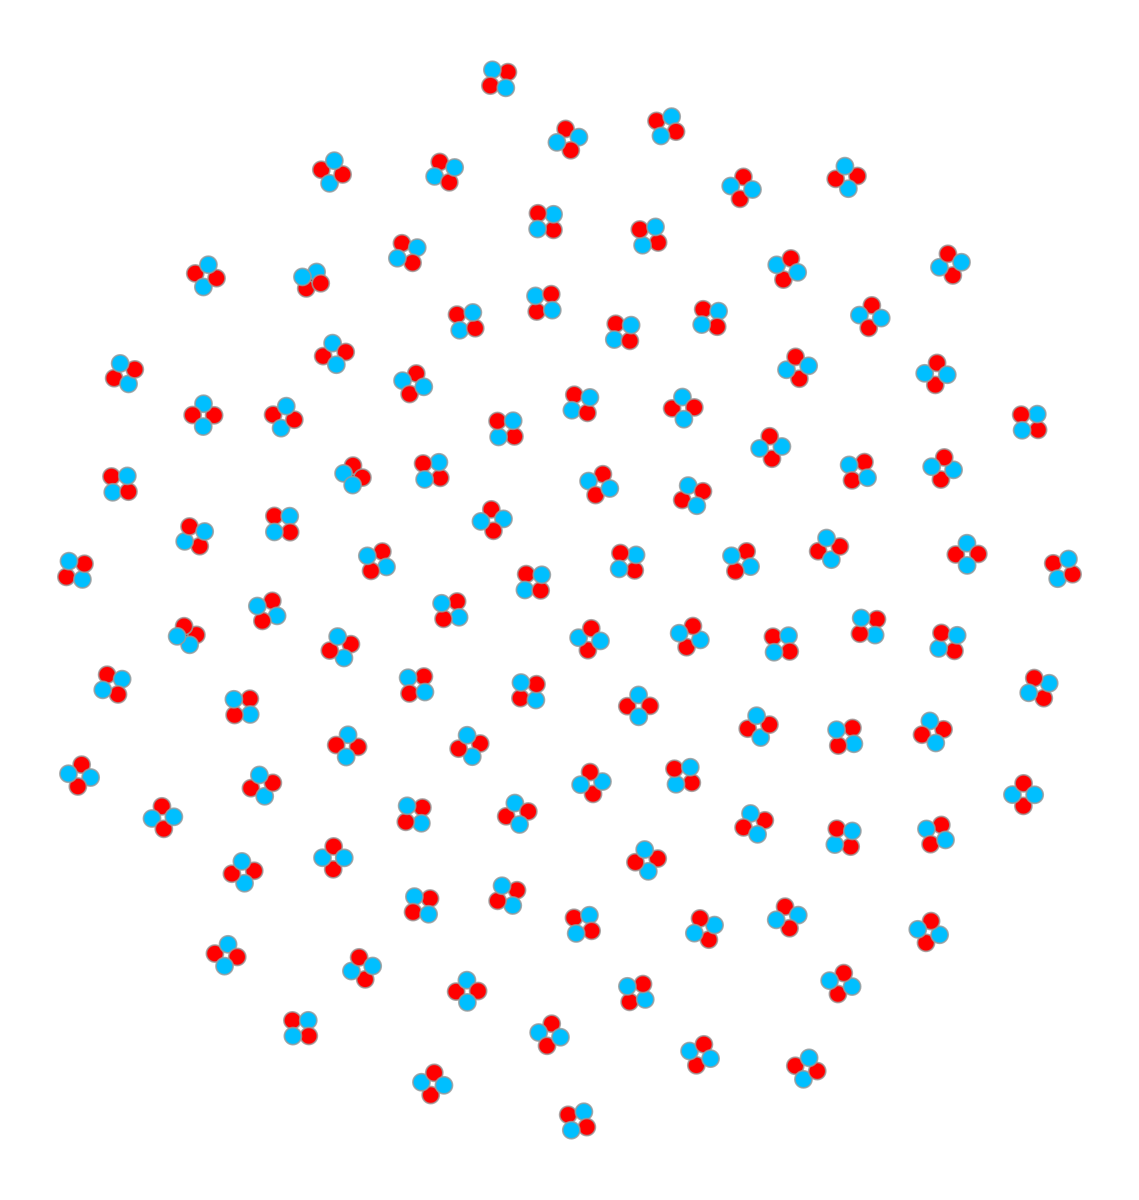

<Figure size 500x500 with 0 Axes>

In [80]:
# Create target hemoglobin network
X = np.array([[1,0],[0,1],[1,0],[0,1]])
X = np.tile(X, (100,1))
O = np.array([[0,2],[2,0]])
g = nx.cycle_graph(4)
for i in range(99):
    g = nx.disjoint_union(g, nx.cycle_graph(4))
g = nx.relabel_nodes(g, dict(zip(g.nodes, range(400))))
target = nd.NetAssembly(X,O,X.sum(axis=0,dtype=int))
target.g = g
target.draw(with_networkx=False,color_key=[to_rgba('red'),to_rgba('deepskyblue')],node_size=10)

In [81]:
# Create target hemoglobin network
X = np.array([[1,0],[0,1],[1,0],[0,1]])
X = np.tile(X, (100,1))
O = np.array([[0,2],[2,0]])
reference_g = nx.configuration_model(np.array(target.g.degree())[:,1])

In [82]:
reference_g = reference_g.copy()
components = [c for c in nx.connected_components(reference_g)]
components = sorted(components,key=len,reverse=True)
# Get the order of the nodes
order = []
for c in components:
    order += list(c)
# Relabel the nodes
reference_A = nx.adjacency_matrix(reference_g).toarray()
reference_A = reference_A[order,:][:,order]
reference_g = nx.from_numpy_array(reference_A)

In [83]:
# dictionary to store the outputs
ref_dists = {}

# loop over all the reconstruction techniques
for d_lab, d_i in distances.items():
    ref_dists[d_lab] = d_i.dist(reference_g,target.g)

/Users/glover.co/anaconda3/lib/python3.11/site-packages/netrd/distance/graph_diffusion.py:167: ComplexWarning: Casting complex values to real discards the imaginary part
  diffs[kt] = (diff ** 2).sum()
/Users/glover.co/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/glover.co/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/glover.co/anaconda3/lib/python3.11/site-packages/netrd/distance/netsimile.py:174: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  signature_vec[k * 5 + 3] = skew(node_features[:, k])
/Users/glover.co/anaconda3/lib/python3.11/site-packages/netrd/distance/netsimile.py:176: RuntimeWarning: Precision loss occurre

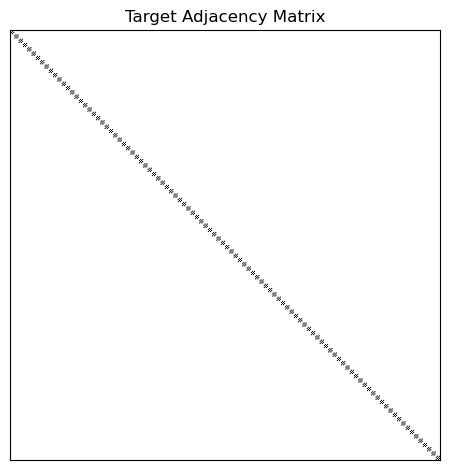

In [84]:
target_A = nx.adjacency_matrix(target.g).toarray()
plt.imshow(target_A,cmap='binary')
plt.xticks([],[])
plt.yticks([],[])
plt.title('Target Adjacency Matrix')
plt.tight_layout()
plt.savefig('figs/012725/hemoglobin_target_adjacency_matrix.pdf')
plt.show()

In [85]:
# Create hemoglobin example
X = nd.create_labels(np.array([200,200]))
O = np.array([[0,2],[2,0]])

In [86]:
hemoglobin = nd.NetAssembly(X,O,X.sum(axis=0,dtype=int),system_energy=1)

In [87]:
components_over_time = np.zeros((12,100))
start = time.time()
for i in range(100):
    components = [c for c in nx.connected_components(hemoglobin.g)]
    component_lengths = [len(c) for c in components]
    # Count how many components there are of size 1 through 12
    for j in range(12):
        components_over_time[j,i] = component_lengths.count(j+1)
    hemoglobin.run(100,component=True,link_strength=hemoglobin.system_energy)
    # Get laplacian matrix
print(f'Graph Tool Time - {time.time() - start}')

Graph Tool Time - 12.808913230895996


/Users/glover.co/anaconda3/lib/python3.11/site-packages/graph_tool/draw/cairo_draw.py:681: UserWarning: Unknown parameter: node_size
  warnings.warn("Unknown parameter: " + k, UserWarning)


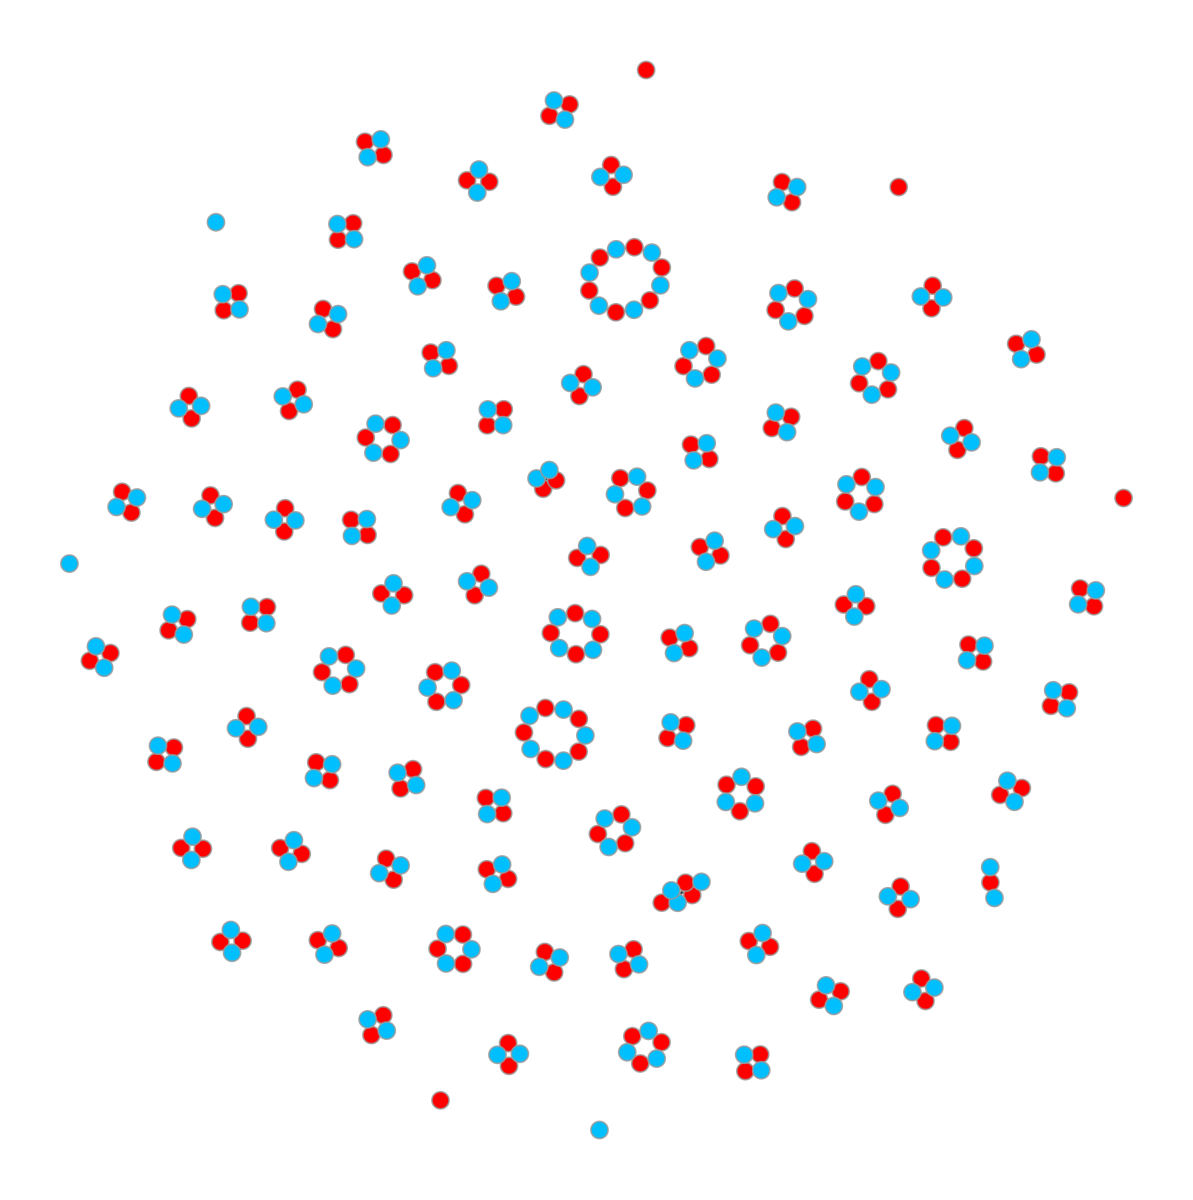

<Figure size 500x500 with 0 Axes>

In [88]:
hemoglobin.draw(with_networkx=False,color_key=[to_rgba('red'),to_rgba('deepskyblue')],node_size=10)#,output='figs/012725/hemoglobin_1_1.pdf') # Draw the graph

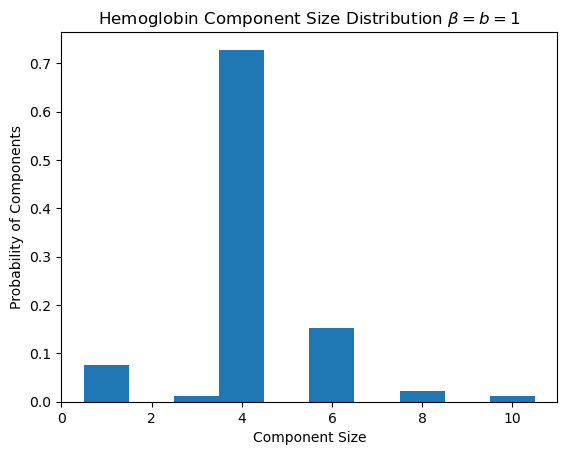

In [89]:
# Get final component distribution
components = [c for c in nx.connected_components(hemoglobin.g)]
component_lengths = [len(c) for c in components]
# Unique component lengths
counts, bins = np.histogram(component_lengths,bins=range(1,np.max(component_lengths)))
plt.bar(bins[:-1],counts/sum(counts),width=1)
plt.xlabel('Component Size')
plt.ylabel('Probability of Components')
plt.title(r'Hemoglobin Component Size Distribution $\beta=b=1$')
plt.savefig('figs/012725/hemoglobin_1_1_component_dist.pdf')
plt.show()


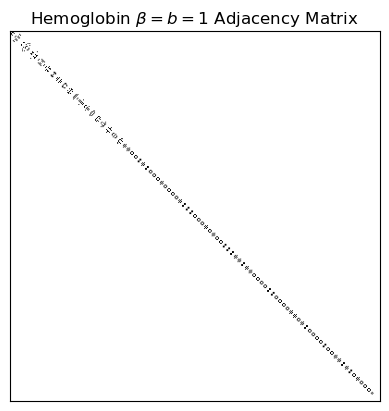

In [90]:
# Reorder nodes based on component size
hemoglobin_g = hemoglobin.g.copy()
components = [c for c in nx.connected_components(hemoglobin.g)]
components = sorted(components,key=len,reverse=True)
# Get the order of the nodes
order = []
for c in components:
    order += list(c)
# Relabel the nodes
hemoglobin_A = nx.adjacency_matrix(hemoglobin_g).toarray()[order,:][:,order]
hemoglobin_g = nx.from_numpy_array(hemoglobin_A)
plt.xticks([],[])
plt.yticks([],[])
plt.imshow(hemoglobin_A,cmap='binary')
plt.title(r'Hemoglobin $\beta=b=1$ Adjacency Matrix')
plt.savefig('figs/012725/hemoglobin_1_1_adjacency_matrix.pdf')


In [91]:
distances = {
    'Jaccard':                 netrd.distance.JaccardDistance(),
    'Hamming':                 netrd.distance.Hamming(),
    'HammingIpsenMikhailov':   netrd.distance.HammingIpsenMikhailov(),
    'Frobenius':               netrd.distance.Frobenius(),
    'PolynomialDissimilarity': netrd.distance.PolynomialDissimilarity(),
    'DegreeDivergence':        netrd.distance.DegreeDivergence(),
    'PortraitDivergence':      netrd.distance.PortraitDivergence(),
    'QuantumJSD':              netrd.distance.QuantumJSD(),
    'CommunicabilityJSD':      netrd.distance.CommunicabilityJSD(),
    'GraphDiffusion':          netrd.distance.GraphDiffusion(),
    # 'ResistancePerturbation':  netrd.distance.ResistancePerturbation(),
    'NetLSD':                  netrd.distance.NetLSD(),
    'IpsenMikhailov':          netrd.distance.IpsenMikhailov(),
    # 'NonBacktrackingSpectral': netrd.distance.NonBacktrackingSpectral(),
    'DistributionalNBD':       netrd.distance.DistributionalNBD(),
    # 'DMeasure':                netrd.distance.DMeasure(),
    'DeltaCon':                netrd.distance.DeltaCon(),
    'NetSimile':               netrd.distance.NetSimile()}

In [92]:
# dictionary to store the outputs
dists = {}

# loop over all the reconstruction techniques
for d_lab, d_i in distances.items():
    dists[d_lab] = d_i.dist(hemoglobin_g,target.g)

/Users/glover.co/anaconda3/lib/python3.11/site-packages/netrd/distance/graph_diffusion.py:167: ComplexWarning: Casting complex values to real discards the imaginary part
  diffs[kt] = (diff ** 2).sum()
/Users/glover.co/anaconda3/lib/python3.11/site-packages/netrd/distance/netsimile.py:174: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  signature_vec[k * 5 + 3] = skew(node_features[:, k])
/Users/glover.co/anaconda3/lib/python3.11/site-packages/netrd/distance/netsimile.py:176: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  signature_vec[k * 5 + 4] = kurtosis(node_features[:, k])


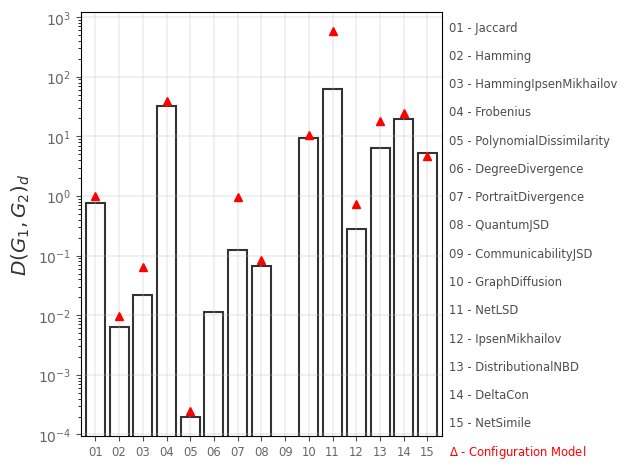

In [93]:
fig, ax = plt.subplots()
ax.bar(x=list(range(len(dists))), height=list(dists.values()), fc='w', ec='.2', lw=1.5)
ax.set_xticks(list(range(len(dists))))
ax.set_xticklabels(["%02i"%(i+1) for i in list(range(len(dists)))],fontsize='small')
ax.set_xlim(-0.6,len(distances)-0.4)
ax.set_yscale('log')
ax.set_ylabel(r'$D(G_1, G_2)_d$', fontsize='x-large', color='.2')
ax.tick_params(labelbottom=True, bottom=True, labelleft=True, left=True, labelcolor='.4', color='.3')
ax.grid(linewidth=1.25,color='.75',alpha=0.25)
for i, title_i in enumerate(list(distances.keys()) + ['Reference']):
    lab_i = "%02i - %s"%(i+1,title_i)
    if i == len(distances):
        lab_i = r"$\Delta$ - Configuration Model"
        ax.text(1.02, 1-(i/len(distances))-0.55/len(distances), lab_i, ha='left', va='center',
               color='r', transform=ax.transAxes, fontsize='small')
    else:
        ax.text(1.02, 1-(i/len(distances))-0.55/len(distances), lab_i, ha='left', va='center',
               color='.3', transform=ax.transAxes, fontsize='small')
ax.plot(np.arange(15),list(ref_dists.values()),'^',color='red',label='CM')
plt.tight_layout()
plt.savefig('figs/012725/hemoglobin_1_1_distance_comparison.pdf')
plt.show()

In [94]:
hemoglobin = nd.NetAssembly(X,O,X.sum(axis=0,dtype=int),system_energy=.5)

In [95]:
components_over_time = np.zeros((12,100))
start = time.time()
for i in range(100):
    components = [c for c in nx.connected_components(hemoglobin.g)]
    component_lengths = [len(c) for c in components]
    # Count how many components there are of size 1 through 12
    for j in range(12):
        components_over_time[j,i] = component_lengths.count(j+1)
    hemoglobin.run(100,component=True,link_strength=1)
    # Get laplacian matrix
print(f'Graph Tool Time - {time.time() - start}')

Graph Tool Time - 12.652202844619751


In [96]:
hemoglobin.draw(with_networkx=False,color_key=[to_rgba('red'),to_rgba('deepskyblue')],node_size=10,output='figs/012725/hemoglobin_05_1.pdf') # Draw the graph

/Users/glover.co/anaconda3/lib/python3.11/site-packages/graph_tool/draw/cairo_draw.py:681: UserWarning: Unknown parameter: node_size
  warnings.warn("Unknown parameter: " + k, UserWarning)


<Figure size 500x500 with 0 Axes>

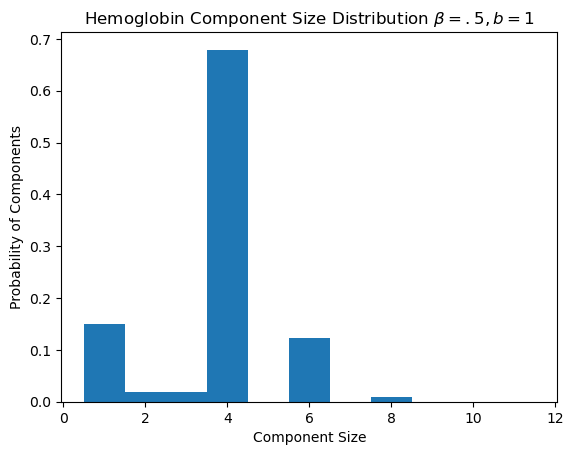

In [97]:
# Get final component distribution
components = [c for c in nx.connected_components(hemoglobin.g)]
component_lengths = [len(c) for c in components]
# Unique component lengths
counts, bins = np.histogram(component_lengths,bins=range(1,13))
plt.bar(bins[:-1],counts/sum(counts),width=1)
plt.xlabel('Component Size')
plt.ylabel('Probability of Components')
plt.title(r'Hemoglobin Component Size Distribution $\beta=.5,b=1$')
plt.savefig('figs/012725/hemoglobin_05_1_component_dist.pdf')
plt.show()


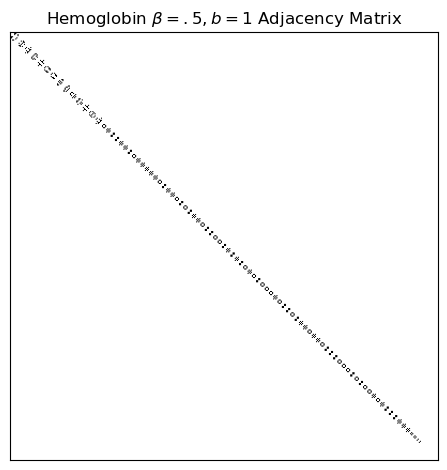

In [98]:
# Reorder nodes based on component size
hemoglobin_g = hemoglobin.g.copy()
components = [c for c in nx.connected_components(hemoglobin.g)]
components = sorted(components,key=len,reverse=True)
# Get the order of the nodes
order = []
for c in components:
    order += list(c)
# Relabel the nodes
hemoglobin_A = nx.adjacency_matrix(hemoglobin_g).toarray()[order,:][:,order]
hemoglobin_g = nx.from_numpy_array(hemoglobin_A)
plt.xticks([],[])
plt.yticks([],[])
plt.imshow(hemoglobin_A,cmap='binary')
plt.title(r'Hemoglobin $\beta=.5,b=1$ Adjacency Matrix')
plt.tight_layout()
plt.savefig('figs/012725/hemoglobin_05_1_adjacency_matrix.pdf')

In [99]:
# dictionary to store the outputs
dists = {}

# loop over all the reconstruction techniques
for d_lab, d_i in distances.items():
    dists[d_lab] = d_i.dist(hemoglobin_g,target.g)

/Users/glover.co/anaconda3/lib/python3.11/site-packages/netrd/distance/graph_diffusion.py:167: ComplexWarning: Casting complex values to real discards the imaginary part
  diffs[kt] = (diff ** 2).sum()
/Users/glover.co/anaconda3/lib/python3.11/site-packages/netrd/distance/netsimile.py:174: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  signature_vec[k * 5 + 3] = skew(node_features[:, k])
/Users/glover.co/anaconda3/lib/python3.11/site-packages/netrd/distance/netsimile.py:176: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  signature_vec[k * 5 + 4] = kurtosis(node_features[:, k])


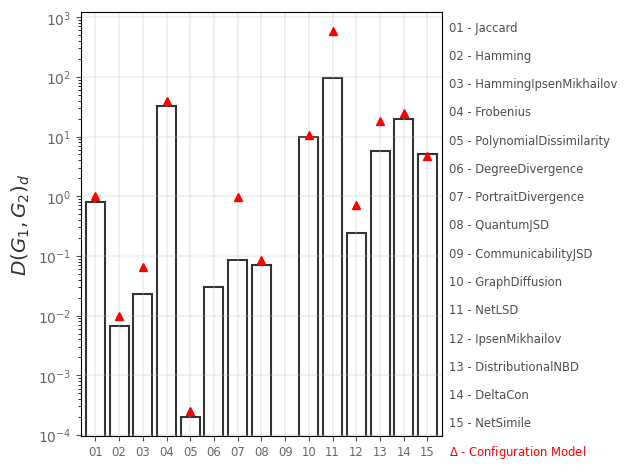

In [100]:
fig, ax = plt.subplots()
ax.bar(x=list(range(len(dists))), height=list(dists.values()), fc='w', ec='.2', lw=1.5)
ax.set_xticks(list(range(len(dists))))
ax.set_xticklabels(["%02i"%(i+1) for i in list(range(len(dists)))],fontsize='small')
ax.set_xlim(-0.6,len(distances)-0.4)
ax.set_yscale('log')
ax.set_ylabel(r'$D(G_1, G_2)_d$', fontsize='x-large', color='.2')
ax.tick_params(labelbottom=True, bottom=True, labelleft=True, left=True, labelcolor='.4', color='.3')
ax.grid(linewidth=1.25,color='.75',alpha=0.25)
for i, title_i in enumerate(list(distances.keys()) + ['Reference']):
    lab_i = "%02i - %s"%(i+1,title_i)
    if i == len(distances):
        lab_i = r"$\Delta$ - Configuration Model"
        ax.text(1.02, 1-(i/len(distances))-0.55/len(distances), lab_i, ha='left', va='center',
               color='r', transform=ax.transAxes, fontsize='small')
    else:
        ax.text(1.02, 1-(i/len(distances))-0.55/len(distances), lab_i, ha='left', va='center',
               color='.3', transform=ax.transAxes, fontsize='small')
ax.plot(np.arange(15),list(ref_dists.values()),'^',color='red',label='CM')
plt.tight_layout()
plt.savefig('figs/012725/hemoglobin_05_1_distance_comparison.pdf')
plt.show()

In [101]:
hemoglobin = nd.NetAssembly(X,O,X.sum(axis=0,dtype=int),system_energy=1)

In [102]:
components_over_time = np.zeros((12,100))
start = time.time()
for i in range(100):
    components = [c for c in nx.connected_components(hemoglobin.g)]
    component_lengths = [len(c) for c in components]
    # Count how many components there are of size 1 through 12
    for j in range(12):
        components_over_time[j,i] = component_lengths.count(j+1)
    hemoglobin.run(100,component=True,link_strength=.5)
    # Get laplacian matrix
print(f'Graph Tool Time - {time.time() - start}')

Graph Tool Time - 11.569015979766846


In [103]:
hemoglobin.draw(with_networkx=False,color_key=[to_rgba('red'),to_rgba('deepskyblue')],node_size=10,output='figs/012725/hemoglobin_1_05.pdf') # Draw the graph

/Users/glover.co/anaconda3/lib/python3.11/site-packages/graph_tool/draw/cairo_draw.py:681: UserWarning: Unknown parameter: node_size
  warnings.warn("Unknown parameter: " + k, UserWarning)


<Figure size 500x500 with 0 Axes>

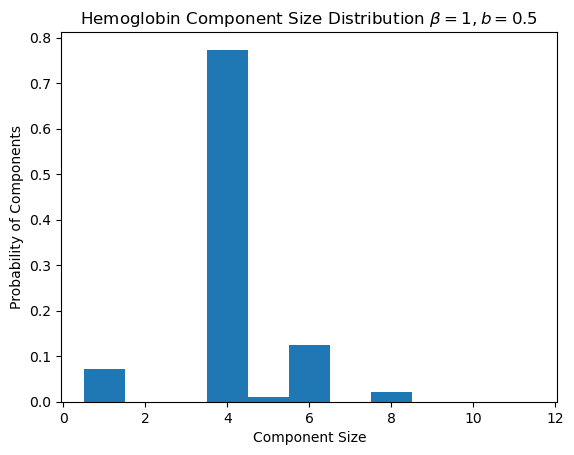

In [104]:
# Get final component distribution
components = [c for c in nx.connected_components(hemoglobin.g)]
component_lengths = [len(c) for c in components]
# Unique component lengths
counts, bins = np.histogram(component_lengths,bins=range(1,13))
plt.bar(bins[:-1],counts/sum(counts),width=1)
plt.xlabel('Component Size')
plt.ylabel('Probability of Components')
plt.title(r'Hemoglobin Component Size Distribution $\beta=1,b=0.5$')
plt.savefig('figs/012725/hemoglobin_1_05_component_dist.pdf')
plt.show()


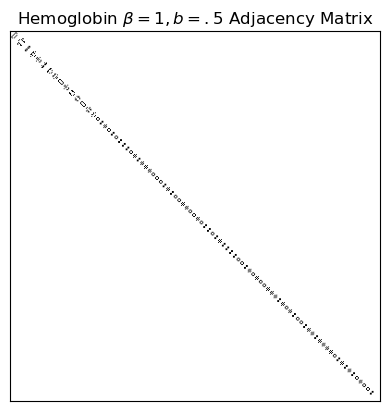

In [105]:
# Reorder nodes based on component size
hemoglobin_g = hemoglobin.g.copy()
components = [c for c in nx.connected_components(hemoglobin.g)]
components = sorted(components,key=len,reverse=True)
# Get the order of the nodes
order = []
for c in components:
    order += list(c)
# Relabel the nodes
hemoglobin_A = nx.adjacency_matrix(hemoglobin_g).toarray()[order,:][:,order]
hemoglobin_g = nx.from_numpy_array(hemoglobin_A)
plt.xticks([],[])
plt.yticks([],[])
plt.imshow(hemoglobin_A,cmap='binary')
plt.title(r'Hemoglobin $\beta=1,b=.5$ Adjacency Matrix')
plt.savefig('figs/012725/hemoglobin_1_05_adjacency_matrix.pdf')

In [106]:
# dictionary to store the outputs
dists = {}

# loop over all the reconstruction techniques
for d_lab, d_i in distances.items():
    dists[d_lab] = d_i.dist(hemoglobin_g,target.g)

/Users/glover.co/anaconda3/lib/python3.11/site-packages/netrd/distance/graph_diffusion.py:167: ComplexWarning: Casting complex values to real discards the imaginary part
  diffs[kt] = (diff ** 2).sum()
/Users/glover.co/anaconda3/lib/python3.11/site-packages/netrd/distance/netsimile.py:174: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  signature_vec[k * 5 + 3] = skew(node_features[:, k])
/Users/glover.co/anaconda3/lib/python3.11/site-packages/netrd/distance/netsimile.py:176: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  signature_vec[k * 5 + 4] = kurtosis(node_features[:, k])


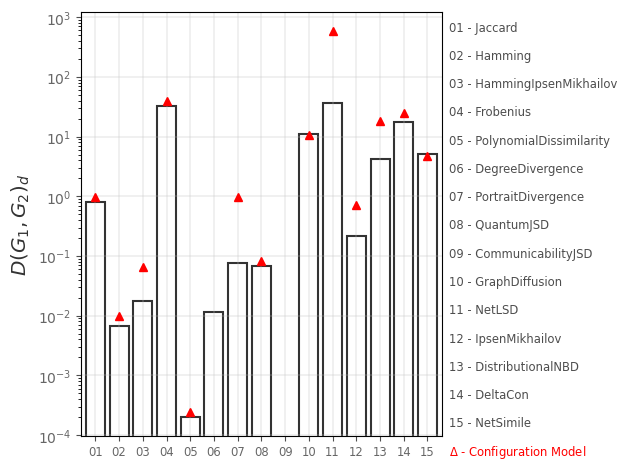

In [107]:
fig, ax = plt.subplots()
ax.bar(x=list(range(len(dists))), height=list(dists.values()), fc='w', ec='.2', lw=1.5)
ax.set_xticks(list(range(len(dists))))
ax.set_xticklabels(["%02i"%(i+1) for i in list(range(len(dists)))],fontsize='small')
ax.set_xlim(-0.6,len(distances)-0.4)
ax.set_yscale('log')
ax.set_ylabel(r'$D(G_1, G_2)_d$', fontsize='x-large', color='.2')
ax.tick_params(labelbottom=True, bottom=True, labelleft=True, left=True, labelcolor='.4', color='.3')
ax.grid(linewidth=1.25,color='.75',alpha=0.25)
for i, title_i in enumerate(list(distances.keys()) + ['Reference']):
    lab_i = "%02i - %s"%(i+1,title_i)
    if i == len(distances):
        lab_i = r"$\Delta$ - Configuration Model"
        ax.text(1.02, 1-(i/len(distances))-0.55/len(distances), lab_i, ha='left', va='center',
               color='r', transform=ax.transAxes, fontsize='small')
    else:
        ax.text(1.02, 1-(i/len(distances))-0.55/len(distances), lab_i, ha='left', va='center',
               color='.3', transform=ax.transAxes, fontsize='small')
ax.plot(np.arange(15),list(ref_dists.values()),'^',color='red',label='CM')
plt.tight_layout()
plt.savefig('figs/012725/hemoglobin_1_05_distance_comparison.pdf')
plt.show()

In [66]:
g = nx.cycle_graph(4)
X = np.array([[1,0],[0,1],[1,0],[0,1]])
X = np.tile(X, (4,1))
obj = nd.NetAssembly(X,np.array([[0,2],[2,0]]),X.sum(axis=0,dtype=int))

In [67]:
obj.run(100,component=False,link_strength=1)

In [69]:
obj.draw(with_networkx=False,color_key=[to_rgba('deepskyblue'),to_rgba('r')],node_size=10,output='bose-einstein_1.pdf')

/Users/glover.co/anaconda3/lib/python3.11/site-packages/graph_tool/draw/cairo_draw.py:681: UserWarning: Unknown parameter: node_size
  warnings.warn("Unknown parameter: " + k, UserWarning)


<Figure size 500x500 with 0 Axes>